In [ ]:
!pip install bertviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 8.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from transformers import BartTokenizer, BartForConditionalGeneration


tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-base", attn_implementation="eager")

model_weights_path = "/content/drive/MyDrive/VQA-Final/part B/Trained models/latest models/model_9.pth"
model.load_state_dict(torch.load(model_weights_path, map_location=torch.device('cpu'))) # add map_location to load the model on the CPU if CPU
model.config.output_attentions = True

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

<ipython-input-3-184685a40913>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_weights_path, map_location=torch.device('cpu'))) # add

In [ ]:
model.eval()

BartForConditionalGeneration(
  (model): BartModel(
    (shared): BartScaledWordEmbedding(50265, 768, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): BartScaledWordEmbedding(50265, 768, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 768)
      (layers): ModuleList(
        (0-5): 6 x BartEncoderLayer(
          (self_attn): BartAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (final_layer_n

In [ ]:
import pandas as pd
import torch

df = pd.read_csv('/content/drive/MyDrive/VQA-Final/part B/Trained models/test_df.csv')
random_row = df.sample(n=1)

input_text = random_row['Question'].values[0]
original_answer = random_row['Answer'].values[0]
inputs = tokenizer(input_text, return_tensors="pt")

with torch.no_grad():
    output = model.generate(**inputs, num_beams=5, max_length=100, early_stopping=True)

# Access the first generated sequence using output.sequences[0]
decoded_output = tokenizer.decode(output.sequences[0], skip_special_tokens=True)

print(f"Question: {input_text}")
print(f"Original Answer : {original_answer}")
print(f"Generated Answer : {decoded_output}")

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:818: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_attentions` is. When `return_dict_in_generate` is not `True`, `output_attentions` is ignored.
  warnings.warn(


Question: what is bhairava's status in relation to cosmic order ?
Original Answer : bhairava is regarded as a guardian of cosmic order.
Generated Answer : bhairava is regarded as an warder of cosmic order due to his role assisting rama in the cosmic order.


In [ ]:
input_text =  "which god is present in taleju temple?"
inputs = tokenizer(input_text, return_tensors="pt")

with torch.no_grad():
    output = model.generate(**inputs, num_beams=5, max_length=100, early_stopping=True, output_attentions=True,
    output_hidden_states=True,
    return_dict_in_generate=True)

# Access the first generated sequence using output.sequences[0]
decoded_output = tokenizer.decode(output.sequences[0], skip_special_tokens=True)

print(f"Question: {input_text}")
print(f"Generated Answer : {decoded_output}")

output.keys()

Question: which god is present in taleju temple?
Generated Answer : a divine being experience as the incarnation of taleju bhawani is present in the taleju temple.


odict_keys(['sequences', 'encoder_attentions', 'encoder_hidden_states', 'decoder_attentions', 'cross_attentions', 'decoder_hidden_states', 'past_key_values'])

In [ ]:
generated_tokens = output.sequences
generated_text = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)

In [ ]:
generated_text

'a divine being experience as the incarnation of taleju bhawani is present in the taleju temple.'

In [ ]:
att_encoder = output.encoder_attentions
att_decoder = output.decoder_attentions
att_cross = output.cross_attentions

In [ ]:
layer = 5

print("cross attention: ", att_cross[layer][0].shape)
print("decoder attention: ", att_decoder[layer][0].shape)
print("encoder attention: ", att_encoder[layer].shape)

cross attention:  torch.Size([5, 12, 1, 11])
decoder attention:  torch.Size([5, 12, 1, 6])
encoder attention:  torch.Size([1, 12, 11, 11])


In [ ]:
att_decoder

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze().tolist())
print(tokens)

['<s>', 'which', 'Ġgod', 'Ġis', 'Ġpresent', 'Ġin', 'Ġtale', 'ju', 'Ġtemple', '?', '</s>']


In [ ]:
output_tokens = tokenizer.convert_ids_to_tokens(generated_tokens.squeeze().tolist())
print(output_tokens)

['</s>', '<s>', 'a', 'Ġdivine', 'Ġbeing', 'Ġexperience', 'Ġas', 'Ġthe', 'Ġincarnation', 'Ġof', 'Ġtale', 'ju', 'Ġb', 'haw', 'ani', 'Ġis', 'Ġpresent', 'Ġin', 'Ġthe', 'Ġtale', 'ju', 'Ġtemple', '.', '</s>']


In [ ]:
from bertviz import model_view

encoder_input_ids = tokenizer(
    input_text,
    return_tensors="pt",
    add_special_tokens=True
).input_ids

decoder_input_ids = tokenizer(
    generated_text,
    return_tensors="pt",
    add_special_tokens=True
).input_ids


outputs = model(input_ids=encoder_input_ids, decoder_input_ids=decoder_input_ids, output_attentions=True)
encoder_text = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])
decoder_text = tokenizer.convert_ids_to_tokens(decoder_input_ids[0])

model_view(
    encoder_attention=outputs.encoder_attentions,
    decoder_attention=outputs.decoder_attentions,
    cross_attention=outputs.cross_attentions,
    encoder_tokens=encoder_text,
    decoder_tokens=decoder_text
)


<IPython.core.display.Javascript object>

In [ ]:
from bertviz import head_view

head_view(
    encoder_attention=outputs.encoder_attentions,
    decoder_attention=outputs.decoder_attentions,
    cross_attention=outputs.cross_attentions,
    encoder_tokens=encoder_text,
    decoder_tokens=decoder_text
)


<IPython.core.display.Javascript object>

# x has much cross attention with the word 'how'
# tokenization divides the word into further sub words like ravi is into 'rav' and 'i'.

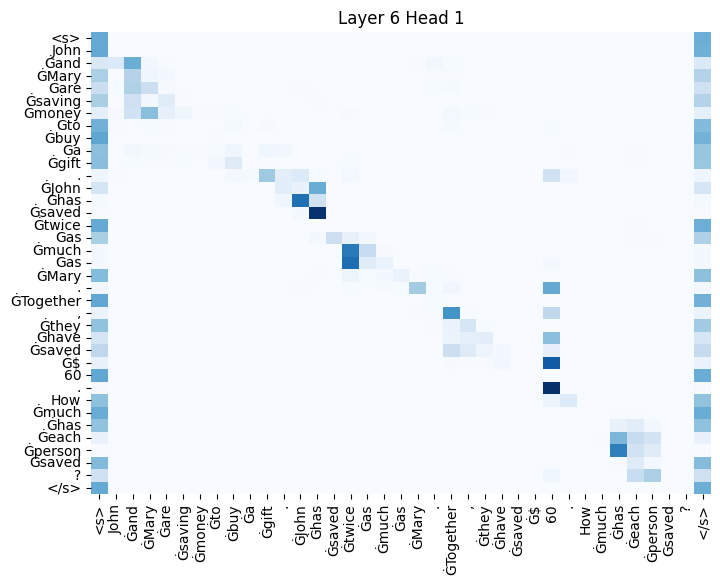

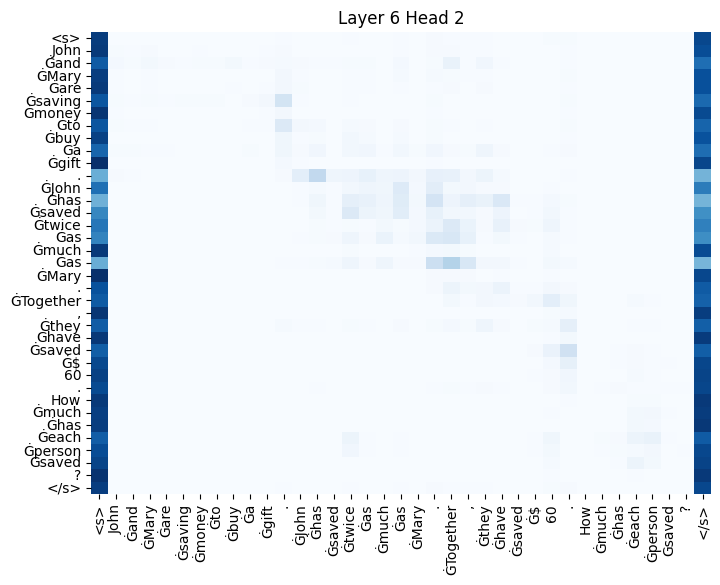

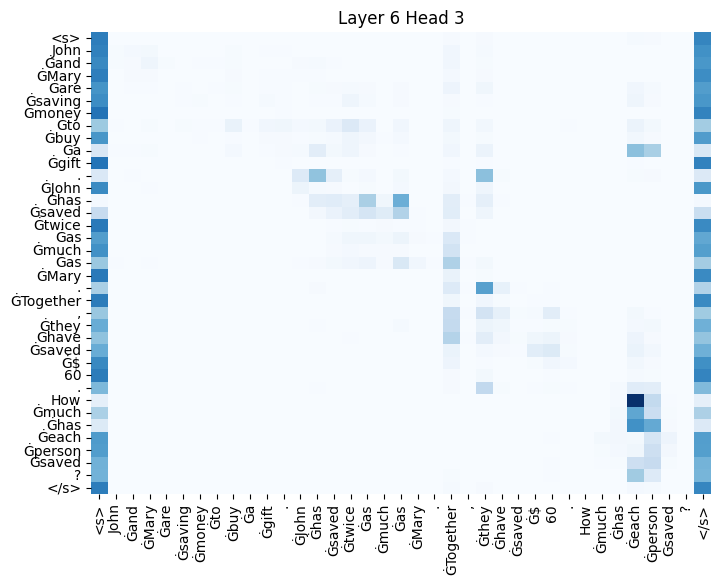

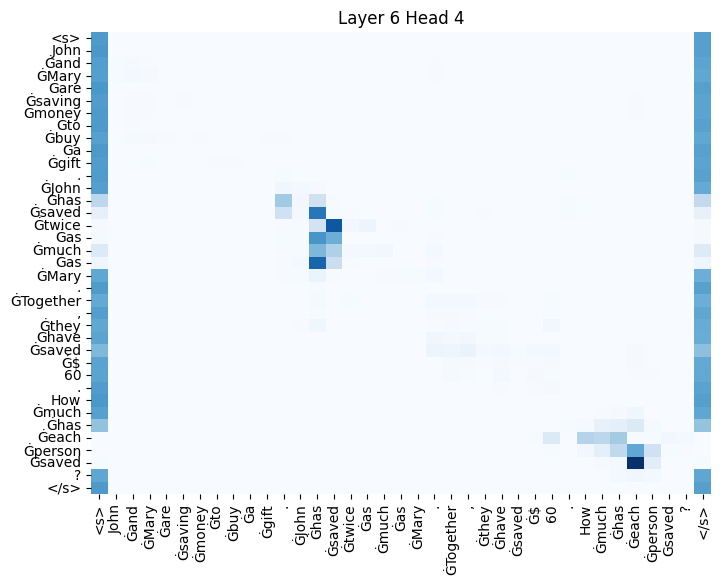

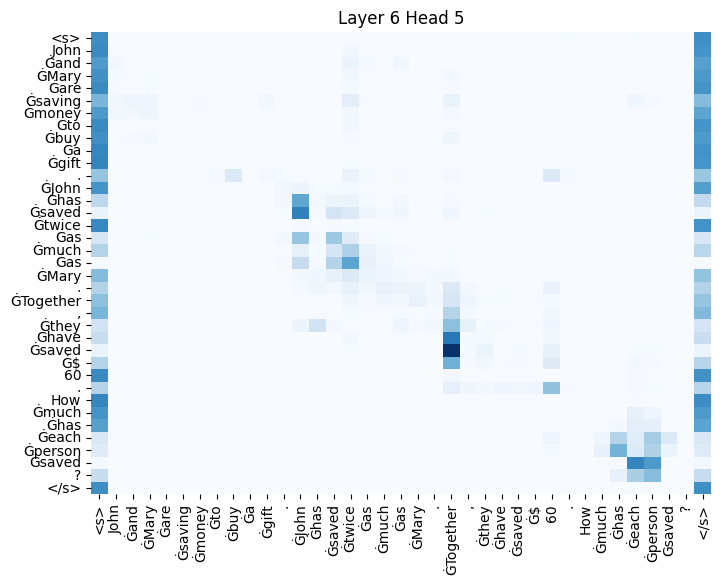

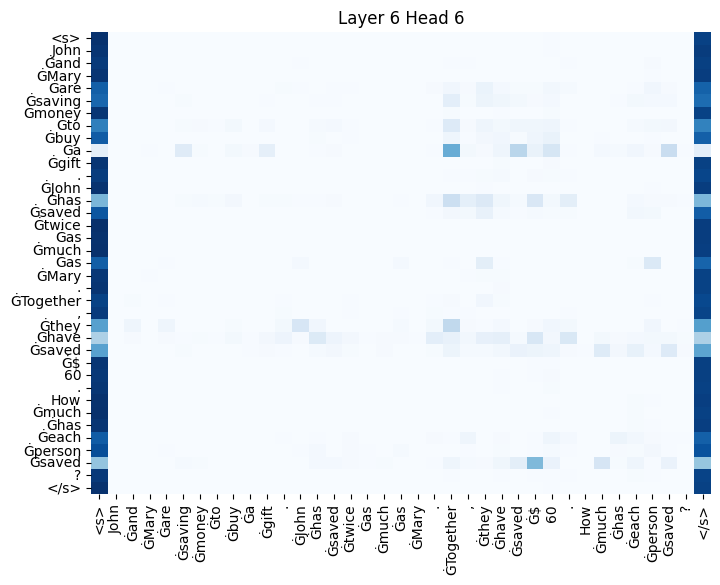

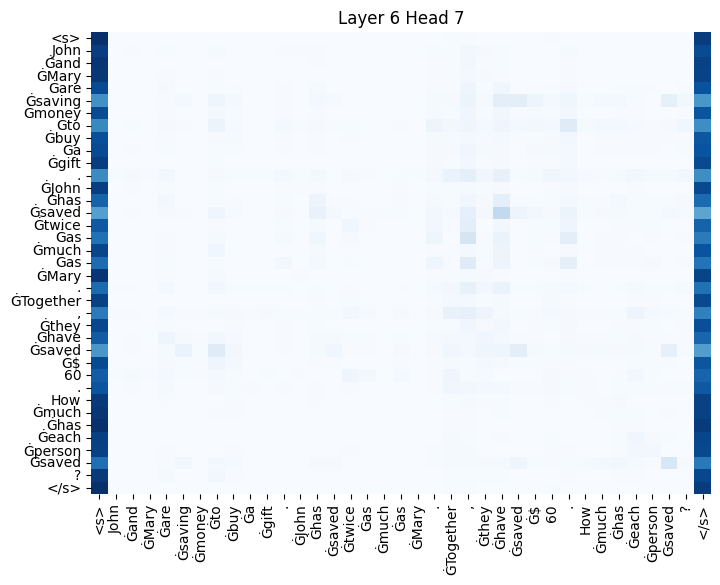

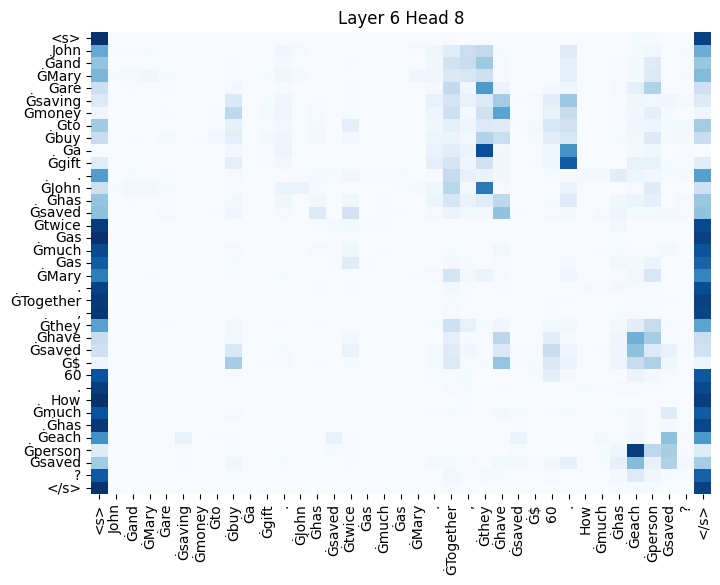

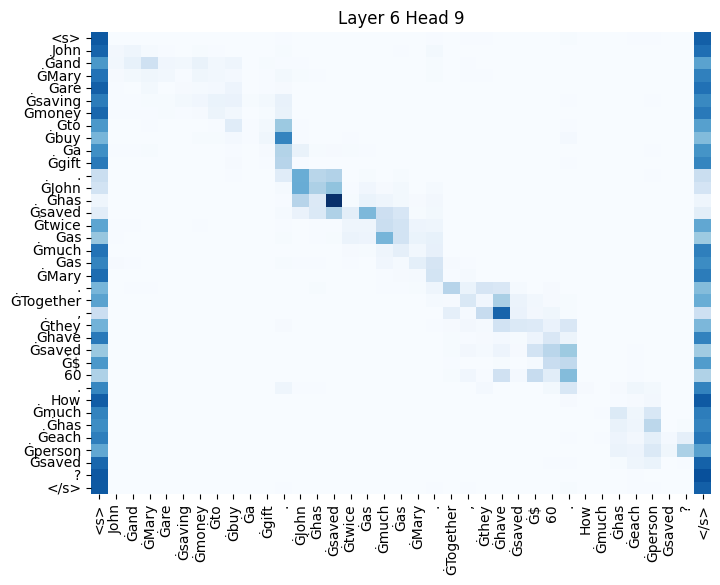

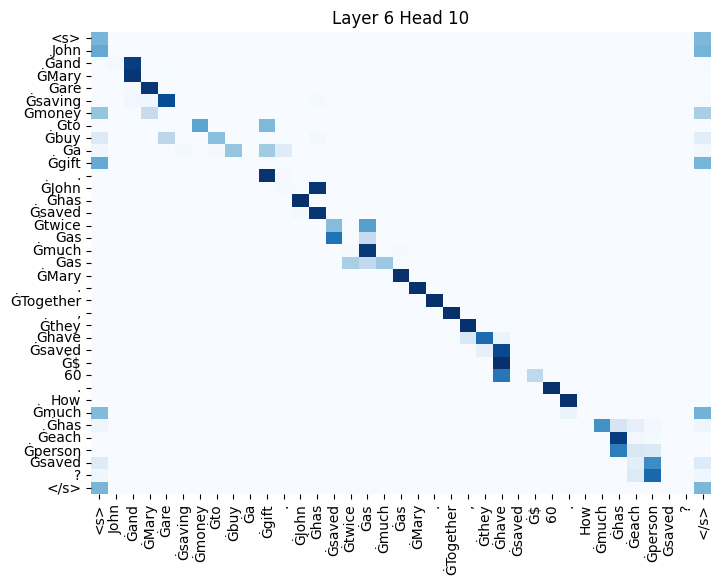

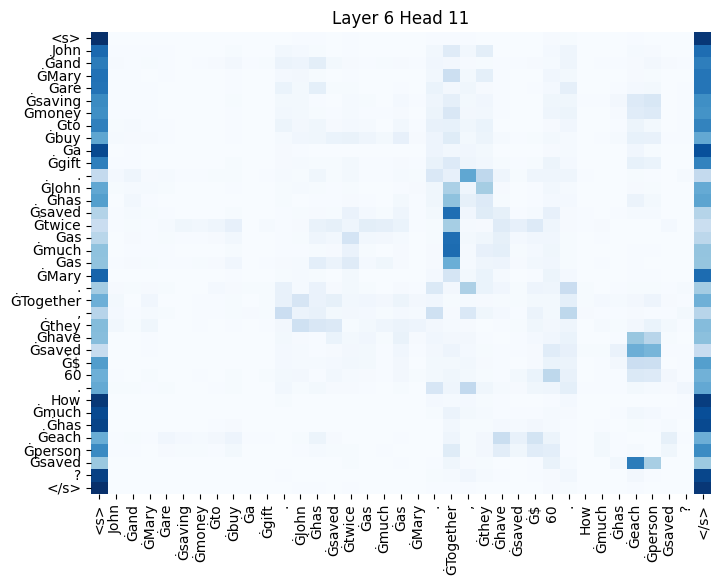

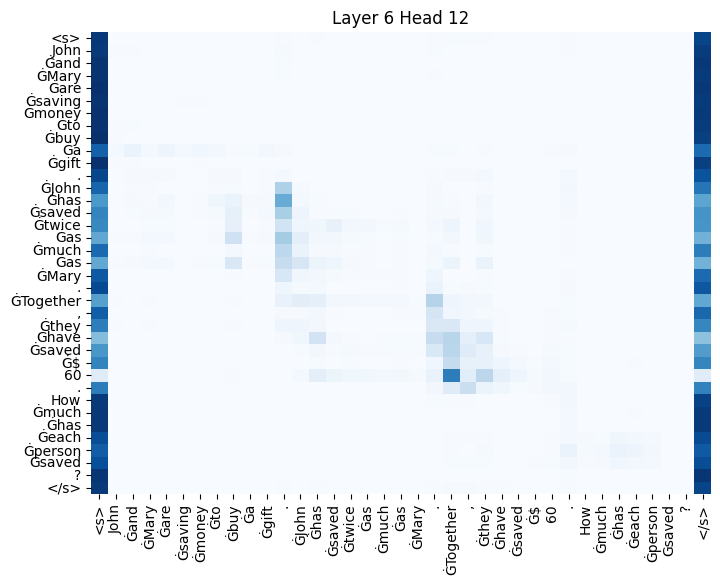

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

layer = 5
num_heads = att_encoder[layer].shape[1]

tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze().tolist())

for head in range(num_heads):
    attention_weights = att_encoder[layer][0, head].detach().numpy()

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        attention_weights,
        cmap="Blues",
        xticklabels=tokens,
        yticklabels=tokens,
        cbar=False
    )

    plt.title(f"Layer {layer + 1} Head {head + 1}")
    plt.show()


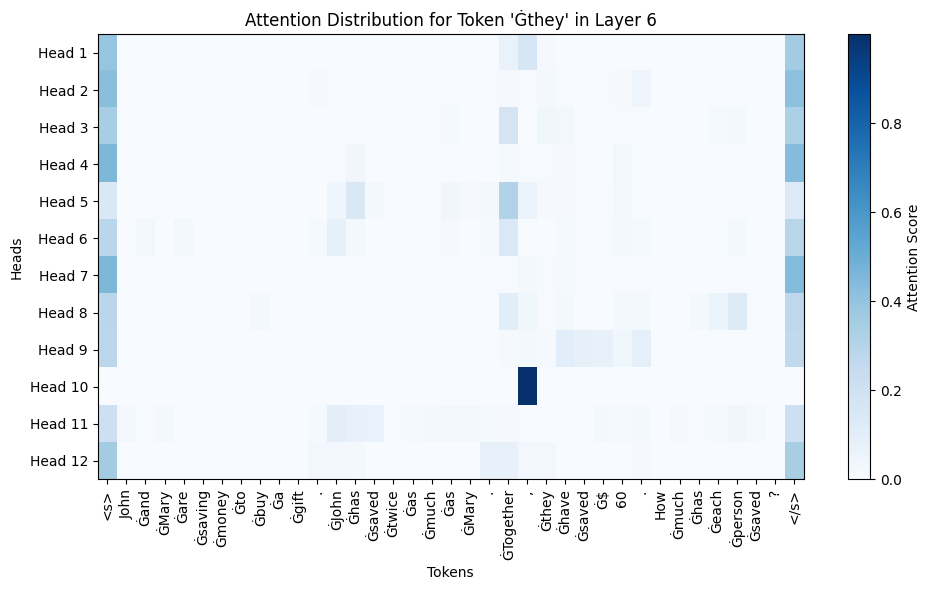

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

token_index = 23
layer = 5

tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze().tolist())
attention_to_token = att_encoder[layer][0, :, token_index, :].detach().numpy()
token_name = tokens[token_index]

plt.figure(figsize=(10, 6))
plt.imshow(attention_to_token, cmap='Blues', aspect='auto')
plt.colorbar(label='Attention Score')
plt.xticks(ticks=np.arange(len(tokens)), labels=tokens, rotation=90)
plt.yticks(ticks=np.arange(attention_to_token.shape[0]), labels=[f"Head {i+1}" for i in range(attention_to_token.shape[0])])
plt.xlabel('Tokens')
plt.ylabel('Heads')
plt.title(f"Attention Distribution for Token '{token_name}' in Layer {layer + 1}")
plt.tight_layout()
plt.show()


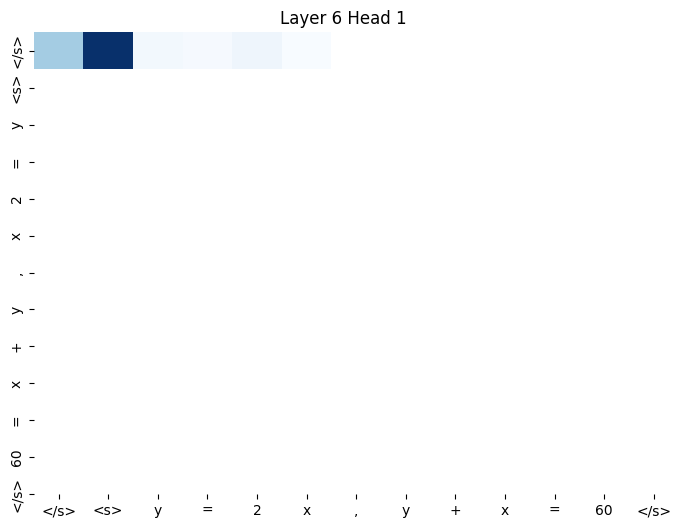

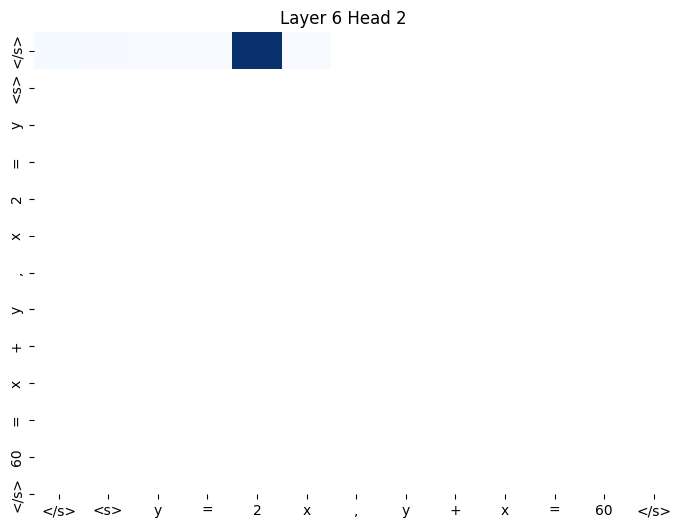

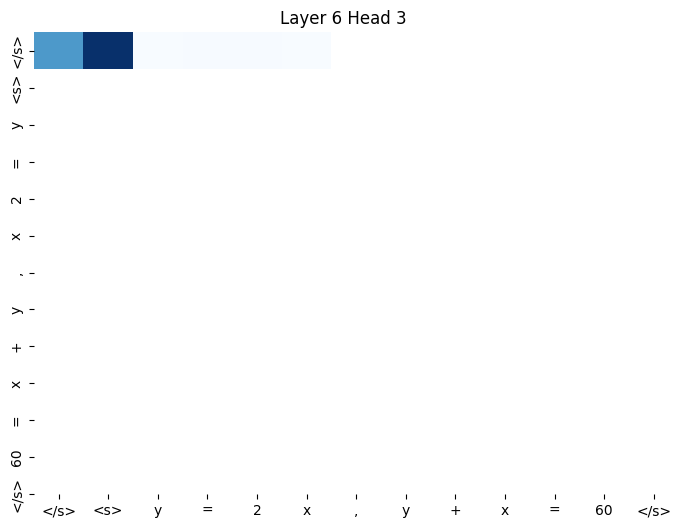

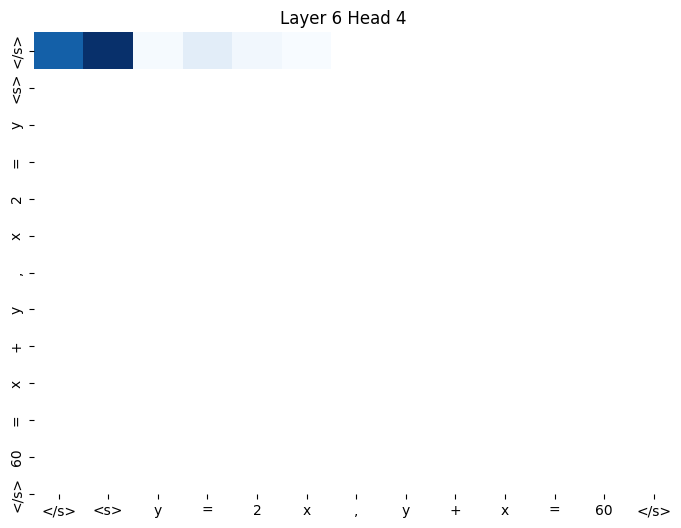

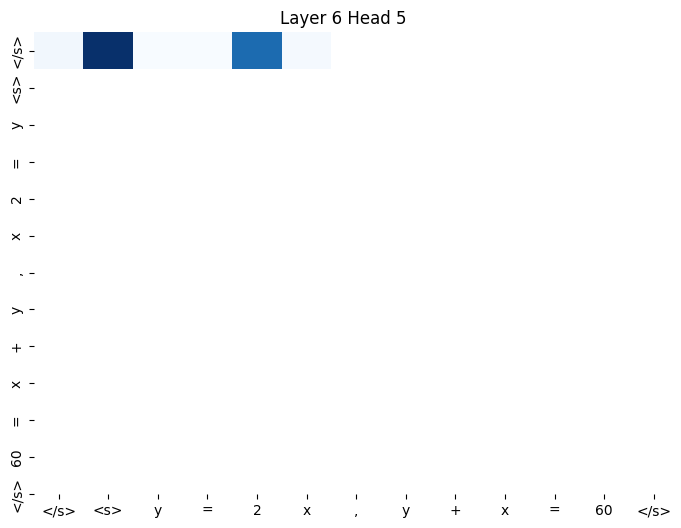

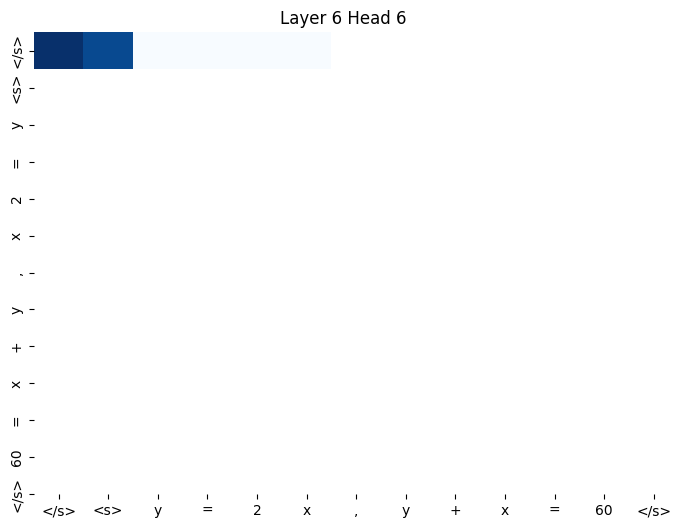

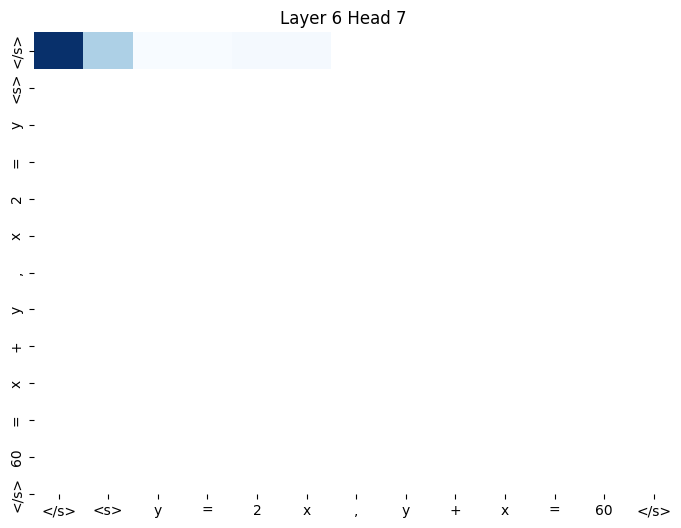

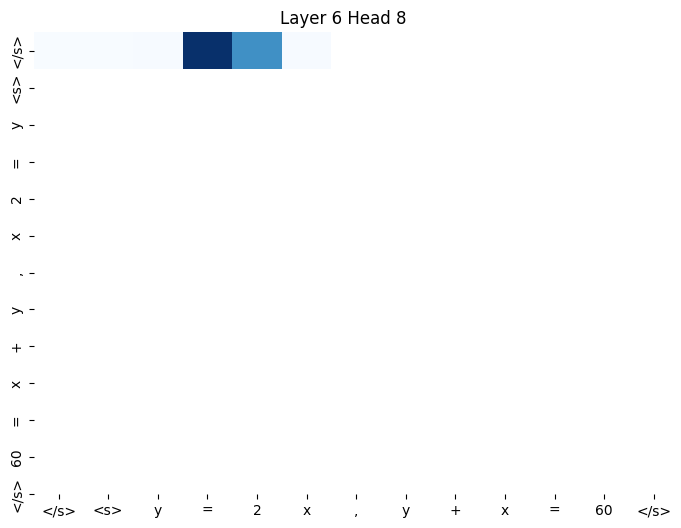

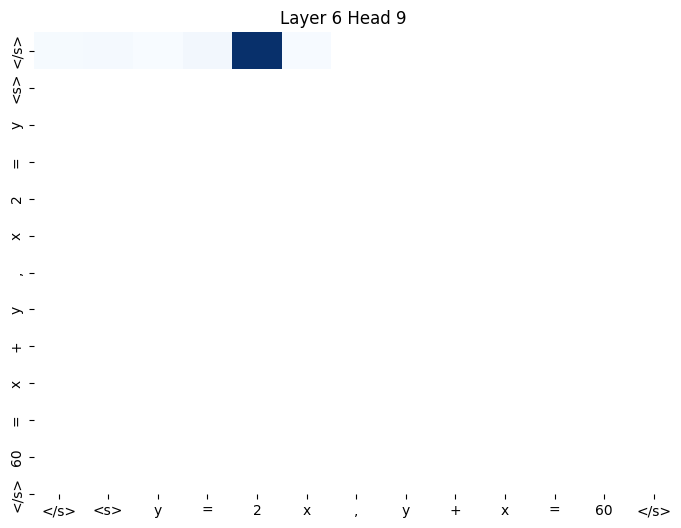

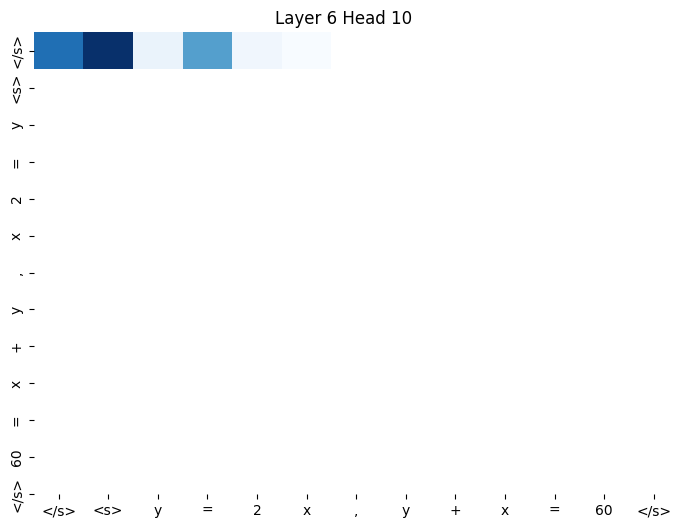

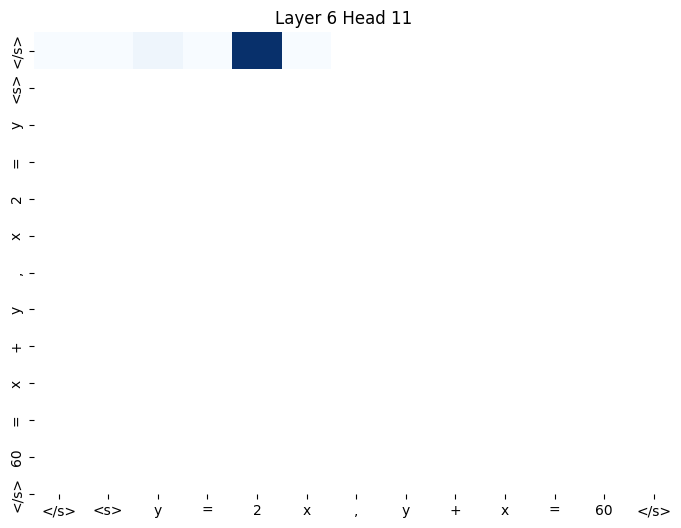

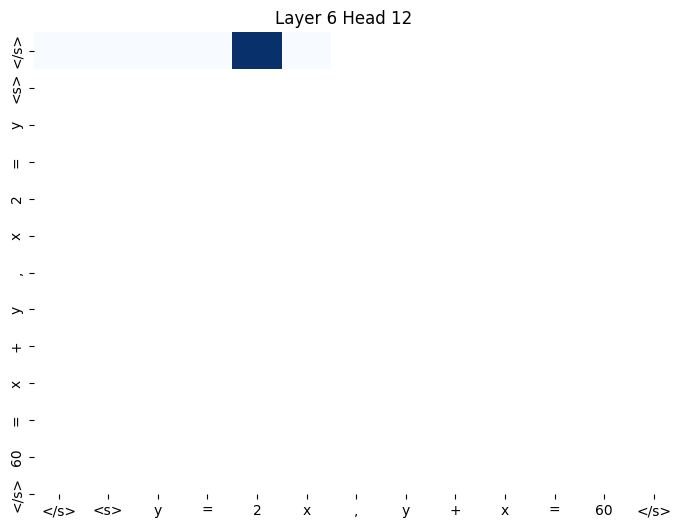

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

layer = 5
num_heads = att_decoder[layer][0].shape[1]

tokens = tokenizer.convert_ids_to_tokens(generated_tokens.squeeze().tolist())

for head in range(num_heads):
    attention_weights = att_decoder[layer][0][0, head].detach().numpy()
    plt.figure(figsize=(8, 6))

    sns.heatmap(
        attention_weights,
        cmap="Blues",
        xticklabels=tokens,
        yticklabels=tokens,
        cbar=False
    )

    plt.title(f"Layer {layer + 1} Head {head + 1}")
    plt.show()

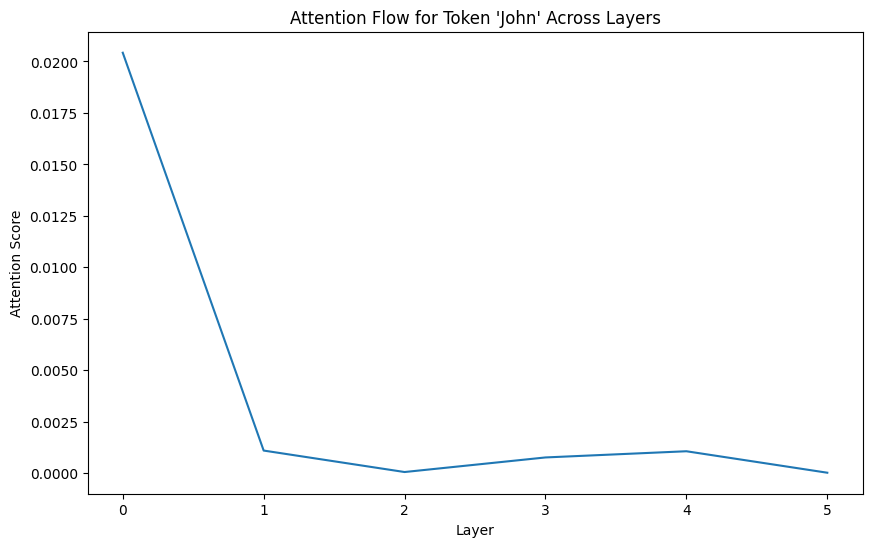

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

token_index = 1
head = 0

tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze().tolist())
attention_flow = [att[0][0, head, token_index].detach().numpy() for att in att_encoder]
token_name = tokens[token_index]

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(attention_flow)), attention_flow)
plt.xlabel('Layer')
plt.ylabel('Attention Score')
plt.title(f"Attention Flow for Token '{token_name}' Across Layers")
plt.show()


Need to see more on this

In [ ]:
from sklearn.decomposition import PCA

layer = 11
hidden_states_last_layer = outputs.encoder_hidden_states[-1]
hidden_states_last_layer = hidden_states_last_layer.reshape(hidden_states_last_layer.shape[1], -1)

pca = PCA(n_components=2)
hidden_states_2d = pca.fit_transform(hidden_states_last_layer)

plt.figure(figsize=(10, 6))
plt.scatter(hidden_states_2d[:, 0], hidden_states_2d[:, 1], c='blue')
for i, token in enumerate(tokens):
    plt.annotate(token, (hidden_states_2d[i, 0], hidden_states_2d[i, 1]))
plt.title(f"PCA Visualization of Hidden States at Layer {layer+1}")
plt.show()



*   **Gradient distributions** : Examining the gradients during training can help understand how the model is learning and whether certain parameters are being updated appropriately.
*   **Saliency Maps**: Highlight the input tokens that the model focuses on for a particular prediction by computing the gradient of the output with respect to the input embeddings.

